# Visualization

## Introduction 
In this notebook, the visualization aspect of the project is being discussed. 

In [3]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from textwrap import wrap
from collections import Counter 
%matplotlib inline 

Let's load `movies.csv.gz` that was produced by [data consolidating notebook](consolidate_scraped_data.ipynb). For this visualization to function, run [this notebook](consolidate_scraped_data.ipynb) first.  

In [4]:
#Load our dataset
movies_df = pd.read_csv("../zippedData/movies.csv.gz",compression='gzip', encoding='utf-8')

In [5]:
#Function to change the production budget, domestic and worldwide gross into a number
def enum(value):
    try:
        return int(''.join(re.findall(r'\d+',value)))
    except:
        return value

movies_df['production_budget'] = movies_df['production_budget'].map(enum)
movies_df['domestic_gross'] = movies_df['domestic_gross'].map(enum)
movies_df['worldwide_gross'] = movies_df['worldwide_gross'].map(enum)
movies_df['startYear'] = movies_df['startYear'].map(enum)

For starters, let's find out the top 10 movies with the highest budgets. 

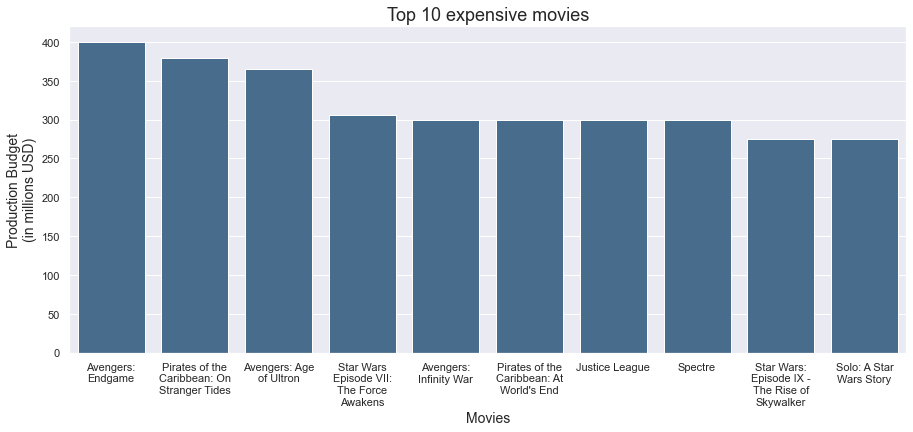

In [185]:
#Plot for the top 10 movie budgets
#Set image size
sns.set(rc={"figure.figsize":(15, 6)})
#Top 10 expensive movies to make 
df = movies_df.sort_values('production_budget',ascending=False)[:10]
df['production_budget'] = df['production_budget']/1e6
ax = sns.barplot(x='movie',
            y='production_budget',
            data=df[['movie','production_budget']],
            color="#3C6D97")
ax.set_xlabel('Movies',fontsize=14)
ax.set_ylabel('Production Budget\n(in millions USD)',fontsize=14)
ax.set_title('Top 10 expensive movies',fontsize=18);
labels = ax.axes.get_xticklabels()
# fix the labels
for v in labels:
    text = v.get_text()
    text = '\n'.join(wrap(text,15))
    v.set_text(text)
# set the new labels
ax.axes.set_xticklabels(labels);
plt.savefig('../images/top_10_expensive.png')

In order to understand which genre has the highest gross, we first need to create a genre boolean dataframe. 

In [82]:
#Function that returns booleans for a Series of lists 
#(Source: https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173) 
def boolean_df(item_lists, unique_items):
    # Create empty dict
    bool_dict = {}    
    # Loop through all the tags
    for i, item in enumerate(unique_items):        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)           
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

#Split genres to list
genres = movies_df['genres'].map(lambda x: x.split(','))
#Convert genres to a dataframe 
genres_split = genres.apply(pd.Series)
#Get unique items from each column
unique_items = [list(genres_split[c].unique()) for c in genres_split]
#Collect all items and find the unique items 
unique_items = Counter([v for s in unique_items for v in s])
#Remove nan column
unique_items = list(unique_items.keys())
unique_items = [x for x in unique_items if str(x) != 'nan']
#Generate a boolean dataframe that contains all genres 
genres_bool = boolean_df(tmp,unique_items)
genres_bool.drop('\\N',axis=1,inplace=True)

Now, let's plot how production budget has changed over the last 21 years

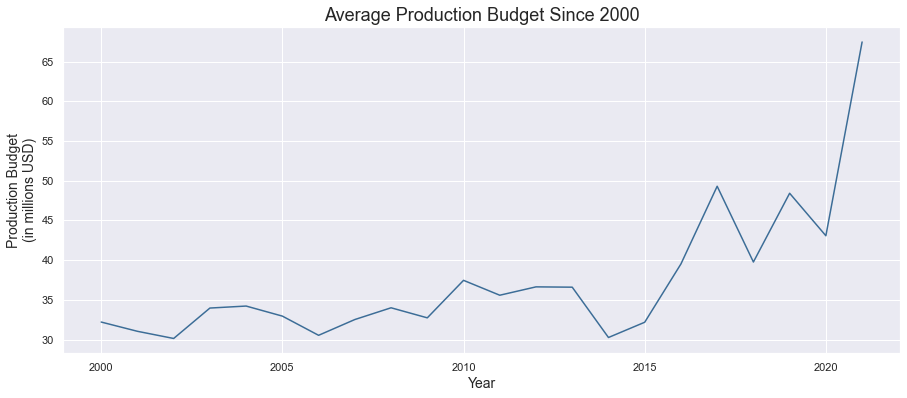

In [196]:
#Movies with release year
#Eliminate Unknows
movies_rel = movies_df[movies_df['startYear']!='Unknown']
#Aggregate by year
movie_trends = movies_rel.groupby('startYear')['production_budget'].agg(['mean'])
movie_trends = movie_trends.reset_index()
#Choose movies released after 2000
movie_trends = movie_trends[movie_trends['startYear']>=2000]
#Show values in millions
movie_trends['mean'] = movie_trends['mean']/1e6
sns.set(rc={"figure.figsize":(15, 6)})
ax = sns.lineplot(data=movie_trends, x='startYear',y='mean',color="#3C6D97")
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Production Budget\n(in millions USD)',fontsize=14)
ax.set_title('Average Production Budget Since 2000',fontsize=18);
plt.savefig('../images/budget_by_year.png')

Let's try to find out if there is a direct correlation between budget and movie gross.

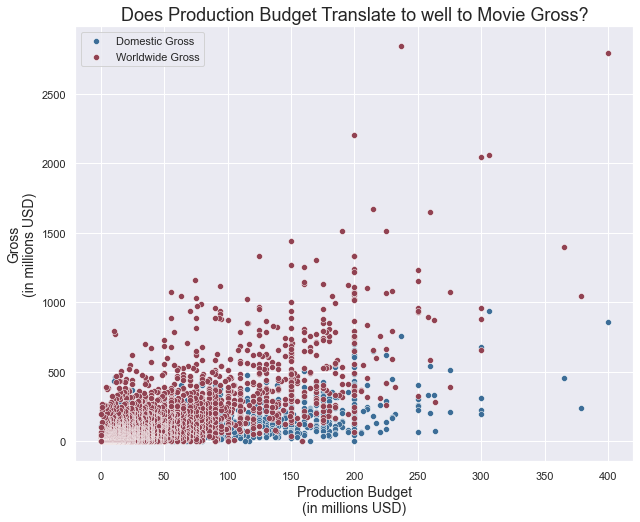

In [11]:
#Relationship between budget and gross
#Set image size
sns.set(rc={"figure.figsize":(10, 8)})
df = movies_df.copy()
#Show budget in millions
df['production_budget'] = df['production_budget']/1e6
df['domestic_gross'] = df['domestic_gross']/1e6
df['worldwide_gross'] = df['worldwide_gross']/1e6
ax_1 = sns.scatterplot(data=df, x='production_budget',y='domestic_gross',color="#3C6D97")
ax_2 = sns.scatterplot(data=df, x='production_budget',y='worldwide_gross',color="#914252")
ax_2.set_xlabel('Production Budget\n(in millions USD)',fontsize=14)
ax_2.set_ylabel('Gross\n(in millions USD)',fontsize=14)
ax_2.set_title('Does Production Budget Translate to well to Movie Gross?',fontsize=18);
plt.legend(labels=["Domestic Gross","Worldwide Gross"])
plt.savefig('../images/budget_and_gross.png')

To understand why some movies have lucrative gross, lets findout which movies earned the highest in domestic and worldwide gross. 

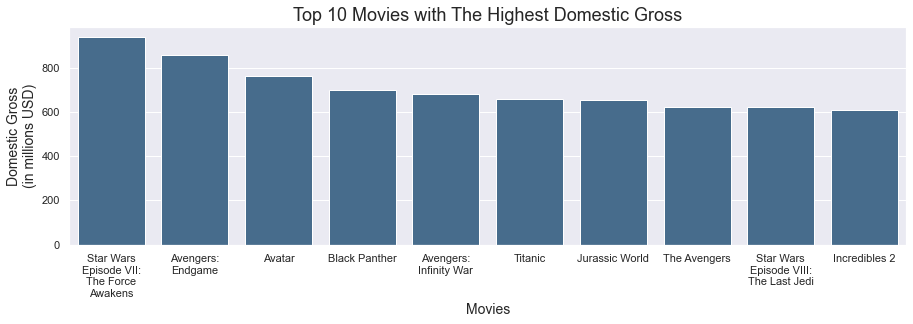

In [189]:
#Set image size
sns.set(rc={"figure.figsize":(15, 4)})
#Find movies with the highest domestic gross
df = movies_df.sort_values('domestic_gross',ascending=False)[:10]
#Show values in millions
df['domestic_gross'] = df['domestic_gross']/1e6
ax = sns.barplot(x='movie',
            y='domestic_gross',
            data=df,
            color="#3C6D97")
ax.set_xlabel('Movies',fontsize=14)
ax.set_ylabel('Domestic Gross\n(in millions USD)',fontsize=14)
ax.set_title('Top 10 Movies with The Highest Domestic Gross',fontsize=18);
labels = ax.axes.get_xticklabels()
# fix the labels
for v in labels:
    text = v.get_text()
    text = '\n'.join(wrap(text,15))
    v.set_text(text)
# set the new labels
ax.axes.set_xticklabels(labels);
plt.savefig('../images/top_grossing_domestic.png')

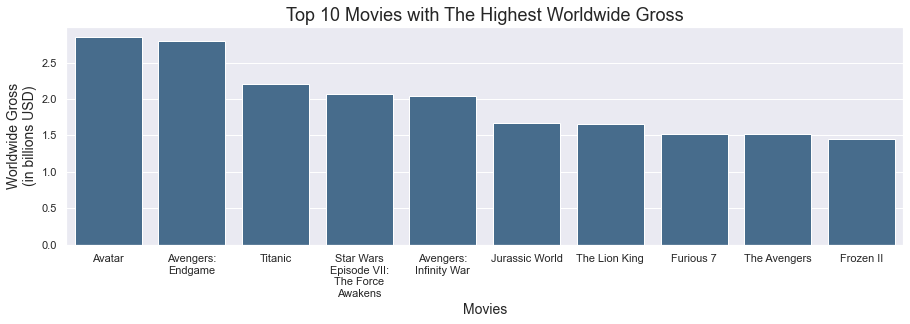

In [190]:
#Set image size
sns.set(rc={"figure.figsize":(15, 4)})
#Find movies with the highest worldwide gross
df = movies_df.sort_values('worldwide_gross',ascending=False)[:10]
#Show values in billions
df['worldwide_gross'] = df['worldwide_gross']/1e9
ax = sns.barplot(x='movie',
            y='worldwide_gross',
            data=df,
            color="#3C6D97")
ax.set_xlabel('Movies',fontsize=14)
ax.set_ylabel('Worldwide Gross\n(in billions USD)',fontsize=14)
ax.set_title('Top 10 Movies with The Highest Worldwide Gross',fontsize=18);
labels = ax.axes.get_xticklabels()
# fix the labels
for v in labels:
    text = v.get_text()
    text = '\n'.join(wrap(text,15))
    v.set_text(text)
# set the new labels
ax.axes.set_xticklabels(labels);
plt.savefig('../images/top_grossing_world.png')

Here, we need to understand if budget has strong correlation with rating. 

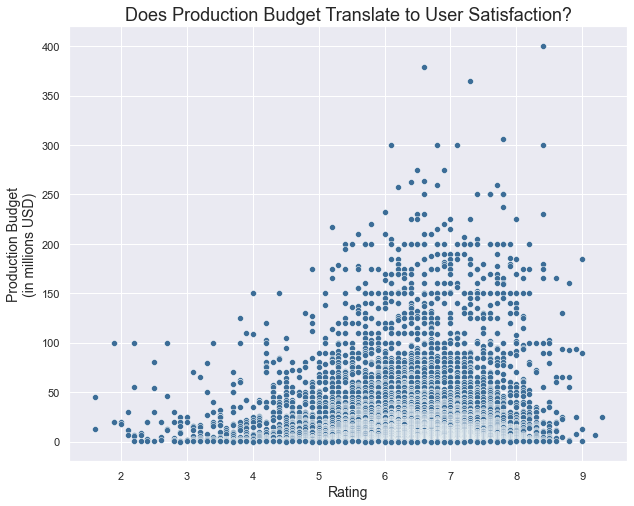

In [191]:
#Set image size
sns.set(rc={"figure.figsize":(10, 8)})
df = movies_df.copy()
#Show budget in millions
df['production_budget'] = df['production_budget']/1e6
ax_2 = sns.scatterplot(data=df, x='averageRating',y='production_budget',color="#3C6D97")
ax_2.set_xlabel('Rating',fontsize=14)
ax_2.set_ylabel('Production Budget\n(in millions USD)',fontsize=14)
ax_2.set_title('Does Production Budget Translate to User Satisfaction?',fontsize=18);
#plt.legend(labels=["Legend_Day1","Legend_Day2"])
plt.savefig('../images/budge_vs_rating.png')

We also need to verify that if high sales correspond to higher rating. It might sound intuitive but showing the plot can help us understand the problem better. 

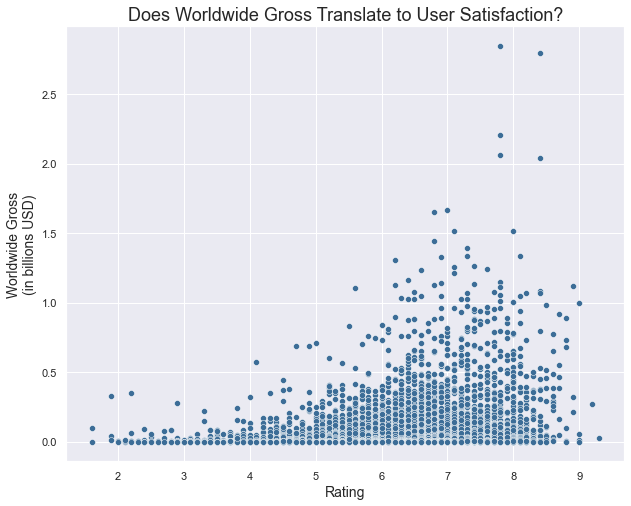

In [276]:
#Set image size
sns.set(rc={"figure.figsize":(10, 8)})
df = movies_df.copy()
#Show values in billions
df['worldwide_gross'] = df['worldwide_gross']/1e9
ax = sns.scatterplot(data=df, x='averageRating',y='worldwide_gross',color="#3C6D97")
ax.set_xlabel('Rating',fontsize=14)
ax.set_ylabel('Worldwide Gross\n(in billions USD)',fontsize=14)
ax.set_title('Does Worldwide Gross Translate to User Satisfaction?',fontsize=18)
plt.savefig('../images/worldwide_gross_vs_rating.png')

Rating is controversial. Small amount of good ratings can have skewed effect. Therefore, we need to show if we can show the overall customer satisfaction. This is done through weighted average between rates and number of votes. 

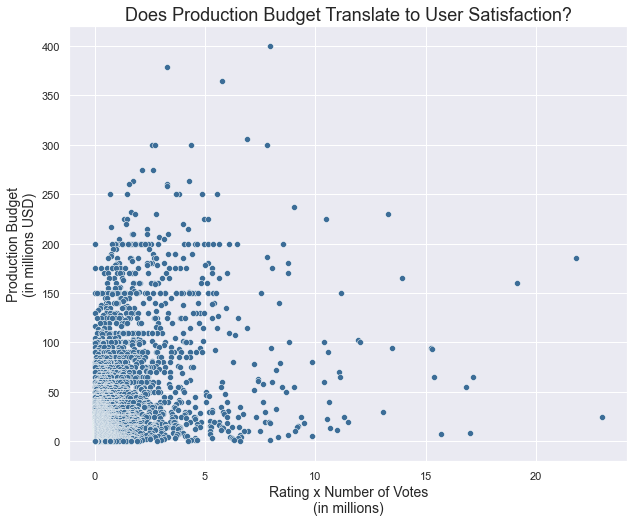

In [192]:
#Set image size
sns.set(rc={"figure.figsize":(10, 8)})
df = movies_df.copy()
#Show values in millions
df['viewer_satisfaction'] = df['averageRating']*df['numVotes']/1e6
df['production_budget'] = df['production_budget']/1e6
ax = sns.scatterplot(data=df, x='viewer_satisfaction',y='production_budget',color="#3C6D97")
ax.set_xlabel('Rating x Number of Votes\n(in millions)',fontsize=14)
ax.set_ylabel('Production Budget\n(in millions USD)',fontsize=14)
ax.set_title('Does Production Budget Translate to User Satisfaction?',fontsize=18);
plt.savefig('../images/satify_vs_budget.png')

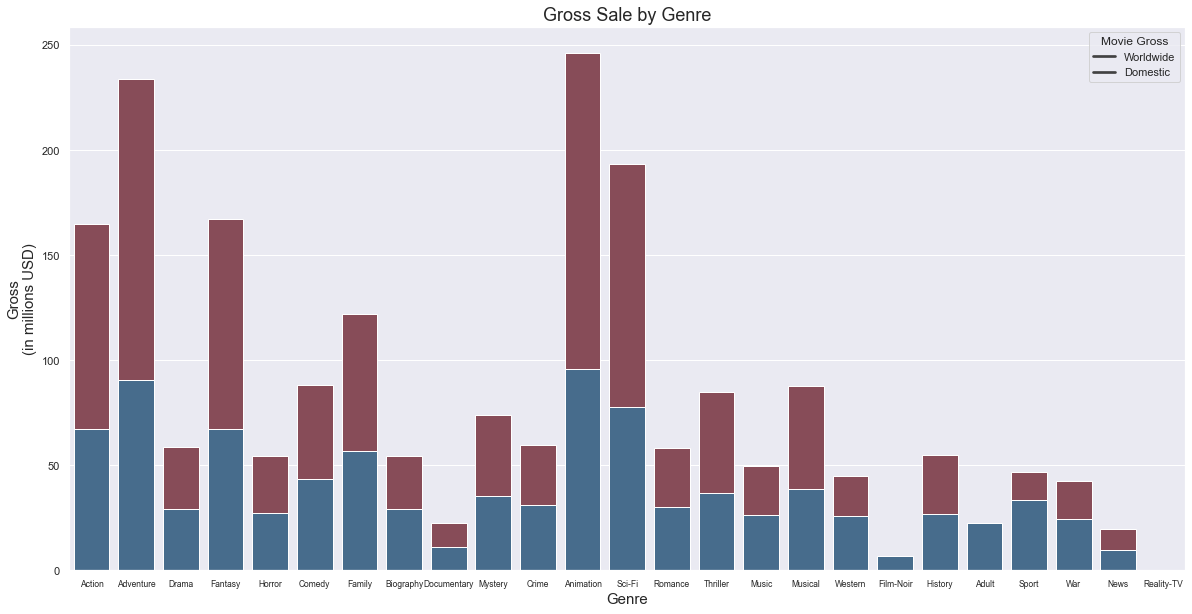

In [195]:
#Set image size
sns.set(rc={"figure.figsize":(20, 10)})
#Get the columns in the boolean genres that we created
genre_col = genres_bool.columns
#Set a dictionary to record the gross per genre
gross_by_genre = {x:[] for x in ['domestic','worldwide','genre']}
for i,col in enumerate(genre_col):
    domestic = movies_df['domestic_gross']
    domestic = domestic[genres_bool[col]].mean()
    worldwide = movies_df['worldwide_gross']
    worldwide = worldwide[genres_bool[col]].mean()
    gross_by_genre['domestic'].append(round(domestic)/1e6)
    gross_by_genre['worldwide'].append(round(worldwide)/1e6)
    gross_by_genre['genre'].append(col)

#Cast the dictionary to a dataframe    
df = pd.DataFrame(gross_by_genre)
labels=["Worldwide","Domestic"]
#Overlay the two plots 
s2 = sns.barplot(x='genre',y='worldwide',data=df,color='#914252')
s1 = sns.barplot(x='genre',y = 'domestic',data=df,color='#3C6D97')
s1.set_xticklabels(s1.get_xmajorticklabels(),fontsize =8.5);
s1.set_xlabel('Genre',fontsize=15)
s1.set_ylabel('Gross\n(in millions USD)',fontsize=15)
s1.set_title('Gross Sale by Genre',fontsize=18);
s1.legend(labels=labels, title = "Movie Gross");
plt.savefig('../images/gross_by_genre.png')

In this last visualization, we are trying to determine which actors and actresses and directors. This could help in casting choices.   

In [263]:
#Load only actors, actresses, directors and writers in leading roles 
top_roles = ['actor_1','actress_1','director_1','writer_1']

for role in top_roles:
    #Get a list of leading roles
    ppl = list(movies_df[role].unique())
    #Create dictionaries with name as roles
    exec(role+" = {}")
    for person in ppl:
        gross = movies_df[movies_df[role]==person]['worldwide_gross'].sum()        
        exec(role+"[person] = gross")    
    #Sort the roles by the amount of worldwide gross of movies they participated    
    exec(role+"=dict(sorted("+role+".items(), key=lambda item: item[1], reverse=True))")
    #Take the first 10 of the sorted roles
    exec(role+"={k: "+role+"[k] for k in list("+role+")[:10]}")

We now have the first 10 roles and the total amount of gross. Let's create plots. 

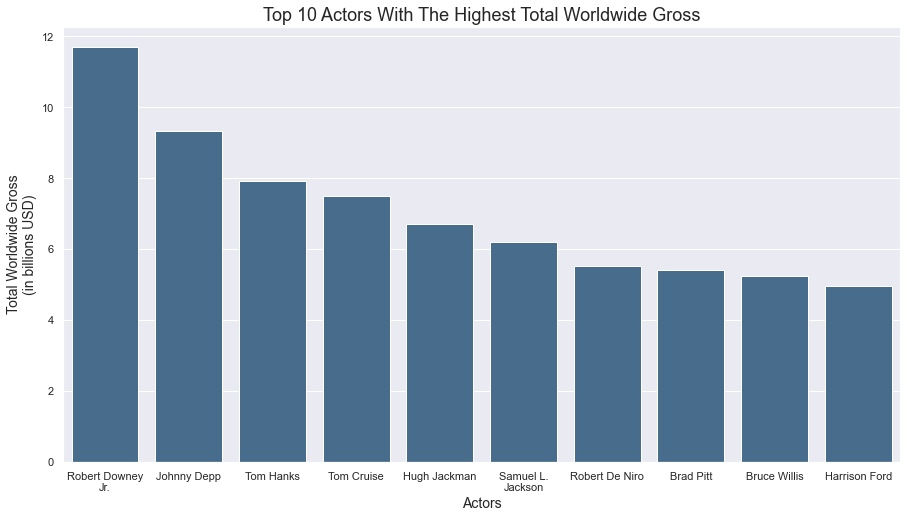

In [272]:
#Set image size
sns.set(rc={"figure.figsize":(15, 8)})
#Get keys and values from the actor_1 dictionary 
keys = list(actor_1.keys())
vals = list(actor_1.values())
vals = [i/1e9 for i in vals]
ax = sns.barplot(x=keys,
            y=vals,
            color="#3C6D97")
ax.set_xlabel('Actors',fontsize=14)
ax.set_ylabel('Total Worldwide Gross\n(in billions USD)',fontsize=14)
ax.set_title('Top 10 Actors With The Highest Total Worldwide Gross',fontsize=18);
labels = ax.axes.get_xticklabels()
# fix the labels
for v in labels:
    text = v.get_text()
    text = '\n'.join(wrap(text,15))
    v.set_text(text)
# set the new labels
ax.axes.set_xticklabels(labels);
plt.savefig('../images/top_grossing_actors.png')

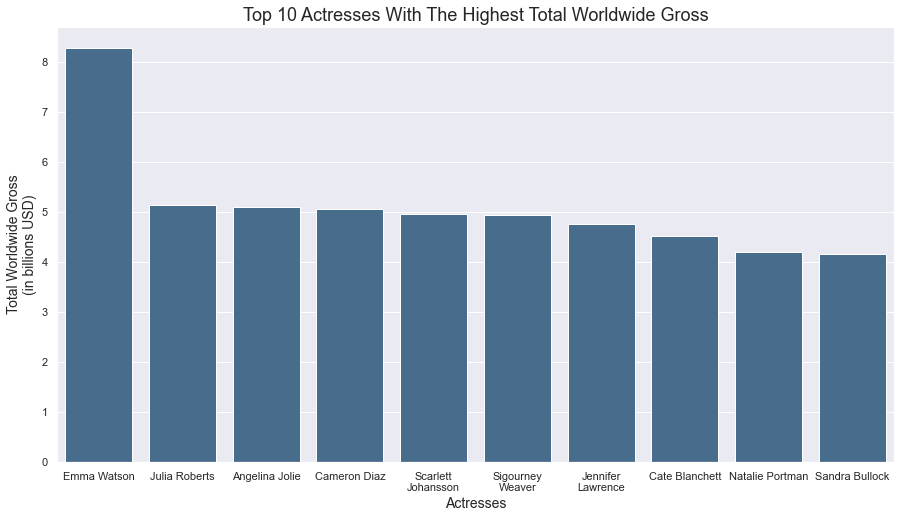

In [273]:
#Set image size 
sns.set(rc={"figure.figsize":(15, 8)})
#Get keys and values from the actress_1 dictionary
keys = list(actress_1.keys())
vals = list(actress_1.values())
vals = [i/1e9 for i in vals]
ax = sns.barplot(x=keys,
            y=vals,
            color="#3C6D97")
ax.set_xlabel('Actresses',fontsize=14)
ax.set_ylabel('Total Worldwide Gross\n(in billions USD)',fontsize=14)
ax.set_title('Top 10 Actresses With The Highest Total Worldwide Gross',fontsize=18);
labels = ax.axes.get_xticklabels()
# fix the labels
for v in labels:
    text = v.get_text()
    text = '\n'.join(wrap(text,15))
    v.set_text(text)
# set the new labels
ax.axes.set_xticklabels(labels);
plt.savefig('../images/top_grossing_actresses.png')

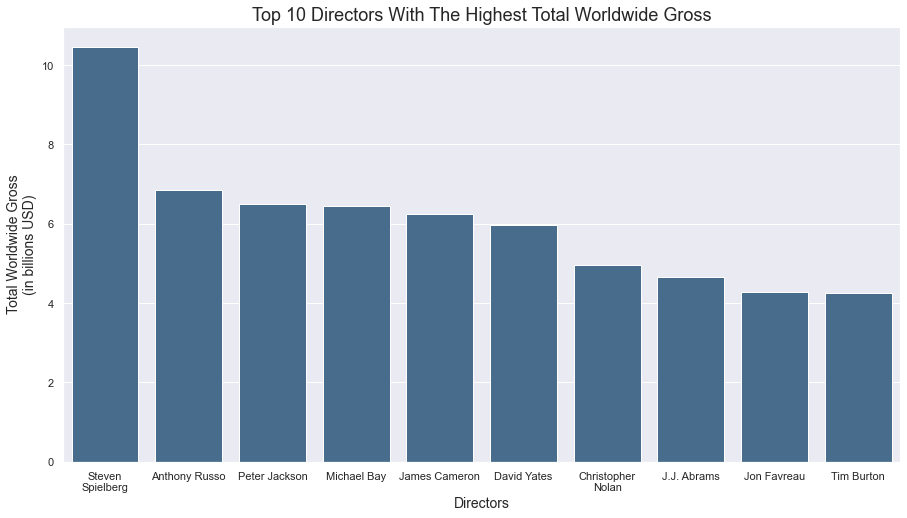

In [274]:
#Set Image size
sns.set(rc={"figure.figsize":(15, 8)})
#Get keys and values from the director_1 dictionary
keys = list(director_1.keys())
vals = list(director_1.values())
vals = [i/1e9 for i in vals]
ax = sns.barplot(x=keys,
            y=vals,
            color="#3C6D97")
ax.set_xlabel('Directors',fontsize=14)
ax.set_ylabel('Total Worldwide Gross\n(in billions USD)',fontsize=14)
ax.set_title('Top 10 Directors With The Highest Total Worldwide Gross',fontsize=18);
labels = ax.axes.get_xticklabels()
# fix the labels
for v in labels:
    text = v.get_text()
    text = '\n'.join(wrap(text,15))
    v.set_text(text)
# set the new labels
ax.axes.set_xticklabels(labels);
plt.savefig('../images/top_grossing_directors.png')